# Analisando Bases de Dados do ENEM

Foi utilizado o conjunto de dados disponível [aqui](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem), pelo INEP.


## Importando os pacotes a serem utilizados

In [23]:
!pip install missingno


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install skimpy plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.7/772.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.0/36.0 MB 113.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 118.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [14]:
import pandas as pd
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

## Base de Dados

In [8]:
# Este é o caminho do arquivo no Google Drive
file_path = 'microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv'


# Carregar o arquivo CSV em um DataFrame
df_microdados = pd.read_csv(file_path, delimiter=";", encoding='latin1' )
df_microdados.shape

(3933955, 76)

In [9]:
df_microdados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [10]:
df_microdados.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3933950,210061959676,2023,12,M,1,1,1,1,6,1,...,B,A,A,C,A,B,E,A,A,B
3933951,210061950911,2023,1,F,1,1,2,3,0,1,...,B,A,B,C,B,B,B,B,C,B
3933952,210061965966,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
3933953,210061932304,2023,2,M,1,1,1,2,0,3,...,B,B,B,C,A,A,D,A,C,B
3933954,210058924455,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,B,A,D,A,B,B


In [11]:
df_microdados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [12]:
df_microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [15]:
skim(df_microdados)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 3933955 │ │ string      │ 37    │                                                         │
│ │ Number of columns │ 76      │ │ float64     │ 21    │                                                         │
│ └───────────────────┴─────────┘ │ int64       │ 18    │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA      ┃ NA %    ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ NU_INSC │       0 │       0 │ 2101000 │ 1155000 │ 2101000 │ 2101000 │ 2101000 │ 2101000 │ 2101000 │ ██████ │  │
│ │ RICAO   │         │         │   00000 │         │   00000 │   00000 │   00000 │   00000 │   00000 │        │  │
│ │ NU_ANO  │       0 │       0 │    2023 │       0 │    2023 │    2023 │    2023 │    2023 │    2023 │     █  │  │
│ │ TP_FAIX │       0 │       0 │   5.096 │   3.872 │       1 │       2 │       3 │       7 │      20 │  █▂▁▂  │  │
│ │ A_ETARI │         │         │         │         │         │         │         │         │         │        │  │
│ │ A       │         │         │         │         │         │         │         │         │         │        │  │
│ │ TP_ESTA │       0 │       0 │   1.044 │   0.412 │       0 │       1 │       1 │       1 │       4 │    █   │  │
│ │ DO_CIVI │         │         │         │         │         │         │         │         │         │        │  │
│ │ L       │         │         │         │         │         │         │         │         │         │        │  │
│ │ TP_COR_ │       0 │       0 │   2.058 │   1.003 │       0 │       1 │       2 │       3 │       5 │   ▇▂█  │  │
│ │ RACA    │         │         │         │         │         │         │         │         │         │        │  │
│ │ TP_NACI │       0 │       0 │   1.028 │  0.2128 │       0 │       1 │       1 │       1 │       4 │    █   │  │
│ │ ONALIDA │         │         │         │         │         │         │         │         │         │        │  │
│ │ DE      │         │         │         │         │         │         │         │         │         │        │  │
│ │ TP_ST_C │       0 │       0 │   1.685 │  0.7468 │       1 │       1 │       2 │       2 │       4 │ █ ▆ ▃  │  │
│ │ ONCLUSA │         │         │         │         │         │         │         │         │         │        │  │
│ │ O       │         │         │         │         │         │         │         │         │         │        │  │
│ │ TP_ANO_ │       0 │       0 │   2.445 │    4.45 │       0 │       0 │       0 │       3 │      17 │ █▁▁  ▁ │  │
│ │ CONCLUI │         │         │         │         │         │         │         │         │         │        │  │
│ │ U       │         │         │         │         │         │         │         │         │         │        │  │
│ │ TP_ESCO │       0 │       0 │   1.416 │  0.6018 │       1 │       1 │       1 │       2 │       3 │ █  ▄ ▁ │  │
│ │ LA      │         │         │         │         │   

<Axes: >

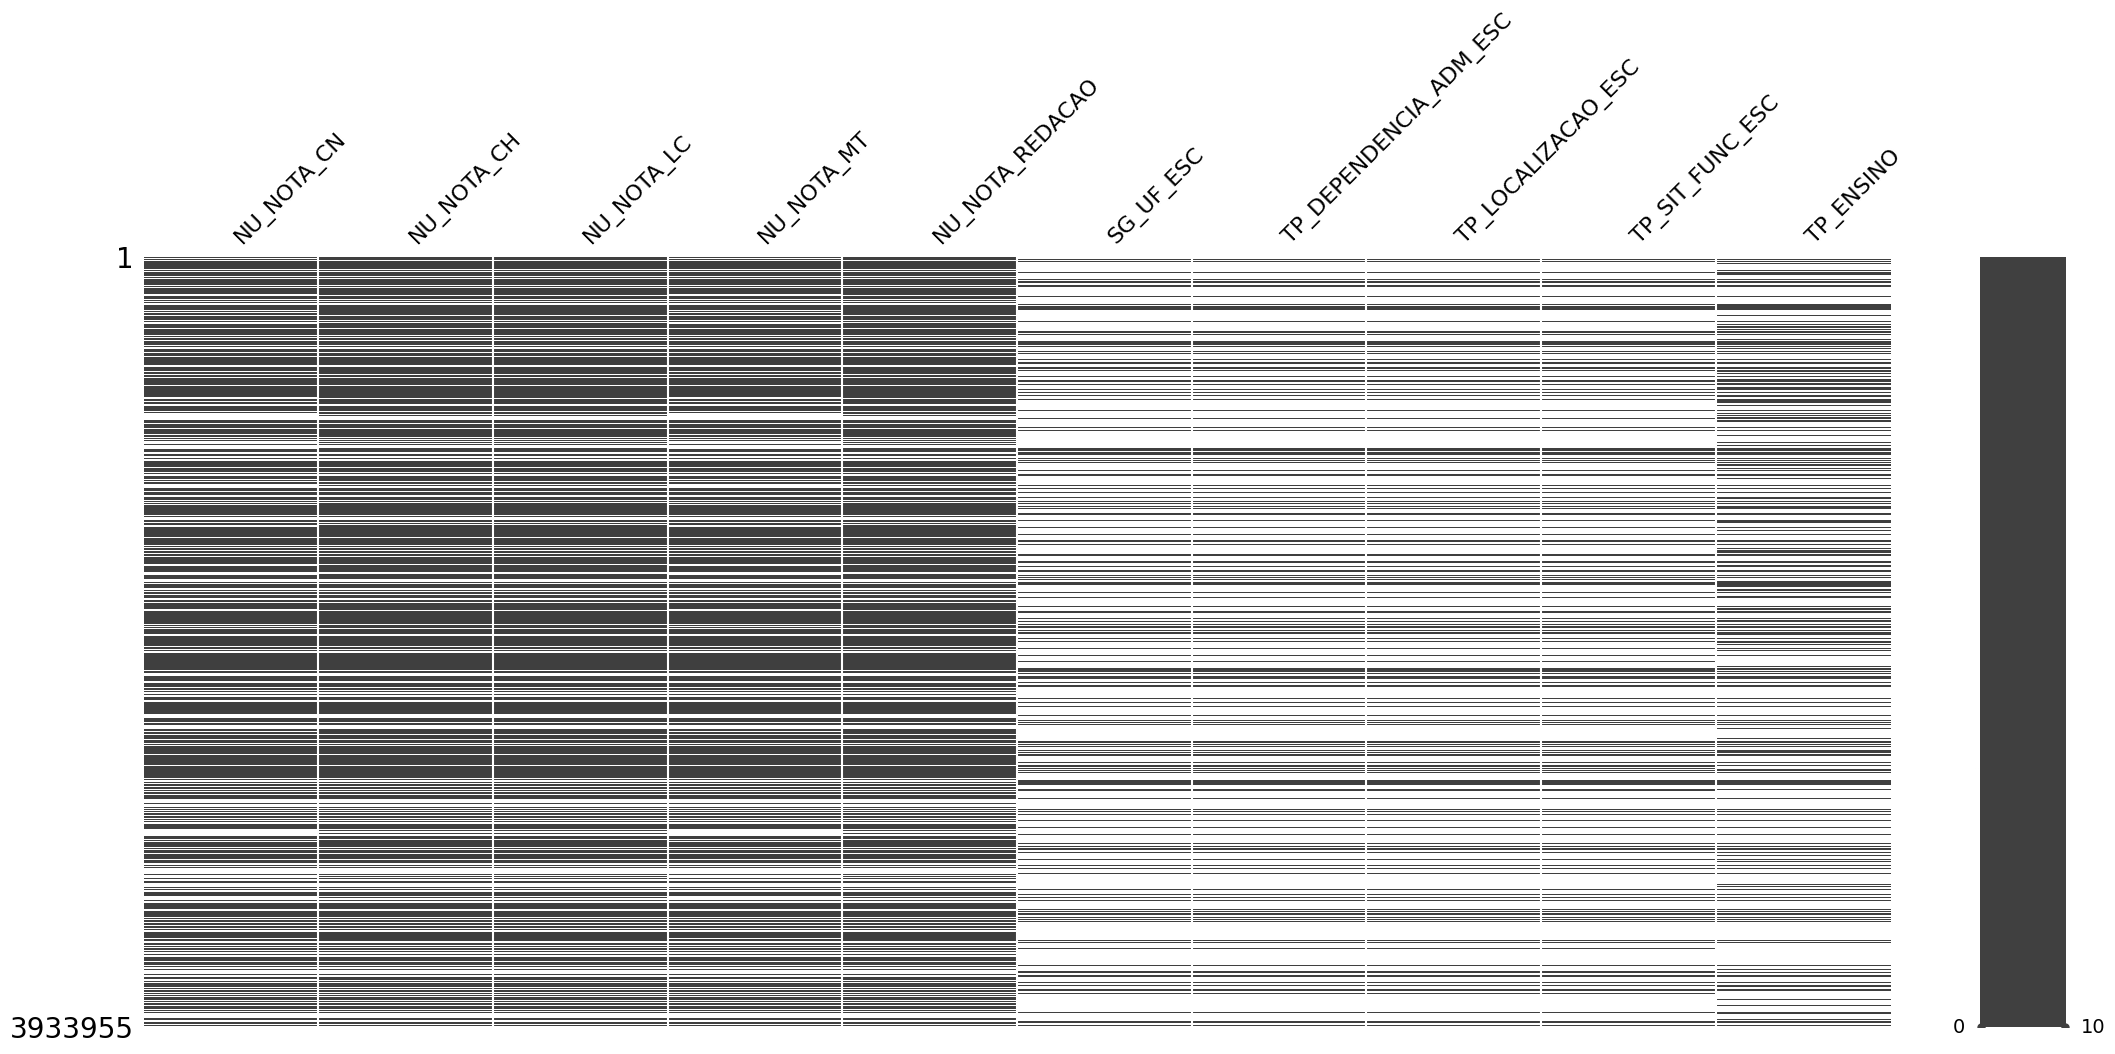

In [24]:
import missingno as msno

msno.matrix(df_microdados[['NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO',
'SG_UF_ESC',
'TP_DEPENDENCIA_ADM_ESC',
'TP_LOCALIZACAO_ESC',
'TP_SIT_FUNC_ESC',
'TP_ENSINO']])

In [18]:
df_microdados['TP_PRESENCA_MT'].value_counts()

TP_PRESENCA_MT
1    2692427
0    1239316
2       2212
Name: count, dtype: int64

## Seleção amostra aleatória

A principio seria utilizada uma amostragem, porém preferi seguir com a base completa.

In [63]:
df=df_microdados.copy()#sample(n=300000,random_state=42)
df.shape

(3933955, 76)

## Filtros

In [64]:
df['TP_PRESENCA_MT'].value_counts()/df.shape[0]

TP_PRESENCA_MT
1    0.684407
0    0.315031
2    0.000562
Name: count, dtype: float64

In [83]:
#Aqui estou limpando os missing data das colunas em que eles representam a ausência do estudante na prova\
 #ou colunas que podem ser interessantes na análise e que os missings não são úteis.

df_filtrado = df.dropna(subset=['NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO'
])


df_filtrado = df_filtrado.drop(['NU_ANO',
'TX_GABARITO_CN',
'TX_GABARITO_CH',
'TX_GABARITO_LC',
'TX_GABARITO_MT',
'TP_LINGUA',
'CO_UF_ESC',
'CO_MUNICIPIO_ESC',
'TP_PRESENCA_CN',
'TP_PRESENCA_CH',
'TP_PRESENCA_LC',
'TP_PRESENCA_MT',
'NO_MUNICIPIO_ESC',
'TX_RESPOSTAS_CN',
'TX_RESPOSTAS_CH',
'TX_RESPOSTAS_LC',
'TX_RESPOSTAS_MT',
'CO_PROVA_CN',
'CO_PROVA_CH',
'CO_PROVA_LC',
'CO_PROVA_MT',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5'
], axis=1)

df_filtrado.shape

(2678264, 50)

### Mediana

In [66]:
df_filtrado['NU_NOTA_MT'].median()

np.float64(523.8)

### Correlação linear

In [67]:
df_filtrado[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
NU_NOTA_CN,1.000000,0.598788,0.583829,0.713877
NU_NOTA_CH,0.598788,1.000000,0.760789,0.625759
NU_NOTA_LC,0.583829,0.760789,1.000000,0.616810
NU_NOTA_MT,0.713877,0.625759,0.616810,1.000000


<Axes: >

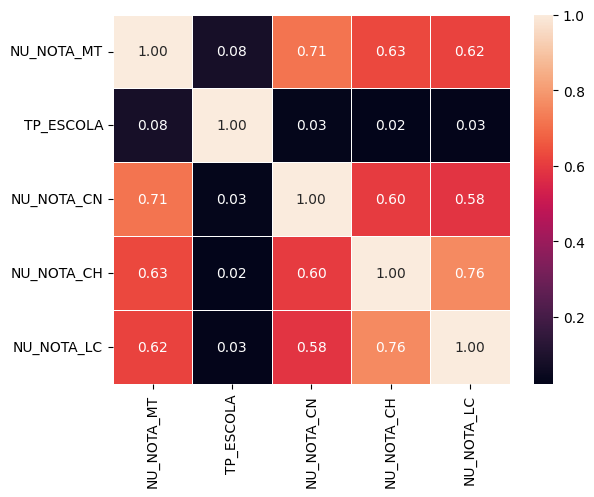

In [68]:
# análise de correlação
correlation = df_filtrado[['NU_NOTA_MT','TP_ESCOLA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].corr()

# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".2f", linewidths=.6)
plot

## Ajuste de vars

In [84]:
faixa_etaria = {1 : 'Menor de 17 anos',
2 : '17 anos',
3 : '18 anos',
4 : '19 anos',
5 : '20 anos',
6 : '21 anos',
7 : '22 anos',
8 : '23 anos',
9 : '24 anos',
10 : '25 anos',
11 : 'Entre 26 e 30 anos',
12 : 'Entre 31 e 35 anos',
13 : 'Entre 36 e 40 anos',
14 : 'Entre 41 e 45 anos',
15 : 'Entre 46 e 50 anos',
16 : 'Entre 51 e 55 anos',
17 : 'Entre 56 e 60 anos',
18 : 'Entre 61 e 65 anos',
19 : 'Entre 66 e 70 anos',
20 : 'Maior de 70 anos'}

faixa_renda = {'A':'Nenhuma Renda',
'B' :'Até R$ 1.212,00',
'C':'De R$ 1.212,01 até R$ 1.818,00',
'D':'De R$ 1.818,01 até R$ 2.424,00',
'E':'De R$ 2.424,01 até R$ 3.030,00',
'F':'De R$ 3.030,01 até R$ 3.636,00',
'G':'De R$ 3.636,01 até R$ 4.848,00',
'H':'De R$ 4.848,01 até R$ 6.060,00',
'I':'De R$ 6.060,01 até R$ 7.272,00',
'J':'De R$ 7.272,01 até R$ 8.484,00',
'K':'De R$ 8.484,01 até R$ 9.696,00',
'L':'De R$ 9.696,01 até R$ 10.908,00',
'M':'De R$ 10.908,01 até R$ 12.120,00',
'N':'De R$ 12.120,01 até R$ 14.544,00',
'O':'De R$ 14.544,01 até R$ 18.180,00',
'P':'De R$ 18.180,01 até R$ 24.240,00',
'Q':'Acima de R$ 24.240,00'}

faixa_escolaridade = {'A': 'Nunca estudou.',
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
'G': 'Completou a Pós-graduação.',
'H': 'Não sei.'}

raca = {0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indígena'}

escola = { 1:'Não Respondeu',
2:'Pública',
3:'Privada'
}

residencia_internet = { 'B':'Sim',
'A':'Não'
}

dep_adm_escola = {1	:'Federal',
2	:'Estadual',
3	:'Municipal',
4	:'Privada',
0    :'Não declarado'
}

localizacao_escola = {1:'Urbana',
2:'Rural',
0    :'Não declarado'}

df_filtrado['TP_FAIXA_ETARIA'] = df_filtrado['TP_FAIXA_ETARIA'].apply(lambda x : faixa_etaria[x])
df_filtrado['TP_COR_RACA'] = df_filtrado['TP_COR_RACA'].apply(lambda x : raca[x])
df_filtrado['Q006'] = df_filtrado['Q006'].apply(lambda x : faixa_renda[x])
df_filtrado['Q002'] = df_filtrado['Q002'].apply(lambda x : faixa_escolaridade[x])
df_filtrado['Q001'] = df_filtrado['Q001'].apply(lambda x : faixa_escolaridade[x])
df_filtrado['TP_ESCOLA'] = df_filtrado['TP_ESCOLA'].apply(lambda x : escola[x])
df_filtrado['Q025'] = df_filtrado['Q025'].apply(lambda x : residencia_internet[x])
df_filtrado['TP_DEPENDENCIA_ADM_ESC'] = df_filtrado['TP_DEPENDENCIA_ADM_ESC'].fillna(0).apply(lambda x : dep_adm_escola[x])
df_filtrado['TP_LOCALIZACAO_ESC'] = df_filtrado['TP_LOCALIZACAO_ESC'].fillna(0).apply(lambda x : localizacao_escola[x])

df_filtrado.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,210061103945,21 anos,F,1,Branca,1,1,0,Não Respondeu,NaN,...,B,A,A,B,A,A,A,A,A,Sim
3,210060214087,17 anos,F,1,Parda,1,2,0,Pública,1.0,...,A,A,A,B,A,A,D,A,A,Sim
4,210059980948,18 anos,F,1,Parda,1,2,0,Pública,1.0,...,A,A,A,B,A,A,B,A,A,Não
9,210060801601,Entre 26 e 30 anos,M,1,Branca,1,1,8,Não Respondeu,NaN,...,B,A,B,C,B,A,C,A,B,Sim
10,210059085130,23 anos,M,1,Parda,1,1,5,Não Respondeu,NaN,...,B,A,B,B,A,A,E,A,B,Sim


## Analise vars de interesse

### Infos nivel escola

In [98]:
df_filtrado['TP_ESCOLA'].value_counts()

TP_ESCOLA
Não Respondeu    1627406
Pública           829530
Privada           221328
Name: count, dtype: int64

In [99]:
df_filtrado['TP_DEPENDENCIA_ADM_ESC'].value_counts()

TP_DEPENDENCIA_ADM_ESC
Não declarado    1956835
Estadual          456911
Privada           214740
Federal            43946
Municipal           5832
Name: count, dtype: int64

In [100]:
df_filtrado['TP_LOCALIZACAO_ESC'].value_counts()

TP_LOCALIZACAO_ESC
Não declarado    1956835
Urbana            697117
Rural              24312
Name: count, dtype: int64

In [101]:
df_filtrado['SG_UF_ESC'].value_counts()

SG_UF_ESC
SP    141339
CE     74319
MG     52837
RJ     49406
PR     39952
BA     34957
PE     34652
RS     32073
GO     28296
PA     27971
SC     23658
MA     23505
PB     18025
DF     16819
ES     16084
AM     14634
PI     14565
RN     14420
AL     13952
MT     12279
MS      9234
SE      8455
RO      7041
TO      4987
AP      3462
AC      2920
RR      1587
Name: count, dtype: int64

### Infos nivel aluno

In [71]:
df_filtrado['TP_SEXO'].value_counts()

TP_SEXO
F    1644046
M    1034218
Name: count, dtype: int64

In [72]:
df_filtrado['Q025'].value_counts()

Q025
Sim    2455844
Não     222420
Name: count, dtype: int64

In [88]:
df_filtrado['Q004'].value_counts()

Q004
B    1047456
D     696171
A     375140
F     231734
E     164434
C     163329
Name: count, dtype: int64

In [74]:
df_filtrado['Q003'].value_counts()

Q003
C    610978
D    553433
B    506488
A    468449
F    319334
E    219582
Name: count, dtype: int64

In [97]:
df_filtrado['TP_COR_RACA'].value_counts(normalize=True)

TP_COR_RACA
Branca           0.430795
Parda            0.417146
Preta            0.118359
Amarela          0.015933
Não declarado    0.012407
Indígena         0.005359
Name: proportion, dtype: float64

### Qual a Faixa de Idade mais frequente? - Moda

In [44]:
df_filtrado['TP_FAIXA_ETARIA'].mode()

0    18 anos
Name: TP_FAIXA_ETARIA, dtype: object

In [45]:
df_filtrado['TP_FAIXA_ETARIA'].value_counts()

TP_FAIXA_ETARIA
18 anos               51921
17 anos               47174
19 anos               22466
Menor de 17 anos      22011
20 anos               13094
Entre 26 e 30 anos     8875
21 anos                8211
22 anos                5877
Entre 31 e 35 anos     4540
23 anos                4499
24 anos                3584
Entre 36 e 40 anos     3475
25 anos                2776
Entre 41 e 45 anos     2408
Entre 46 e 50 anos     1576
Entre 51 e 55 anos      970
Entre 56 e 60 anos      516
Entre 61 e 65 anos      230
Entre 66 e 70 anos       86
Maior de 70 anos         42
Name: count, dtype: int64

### Group by - Variaveis chave

In [90]:
#Média da proficiencia por Sexo declarado
df_filtrado.groupby('TP_SEXO')['NU_NOTA_MT'].agg(['count','mean'])

,count,mean
TP_SEXO,,
F,1644046,517.011339
M,1034218,561.075506


In [91]:
561-517 #diferença de média entre homens e mulheres

44

In [93]:
#Media da proficiencia por faixa etaria
df_filtrado.groupby('TP_FAIXA_ETARIA')['NU_NOTA_MT'].agg(['count','mean','median','var'])

,count,mean,median,var
TP_FAIXA_ETARIA,,,,
17 anos,620798,546.074379,541.50,16536.337464
18 anos,682826,533.261587,522.60,16453.874628
19 anos,292330,532.137308,518.50,17896.296511
20 anos,169359,533.829240,518.50,18781.952395
21 anos,108734,534.850564,518.90,19272.278259
22 anos,77814,533.246035,516.90,19014.417906
23 anos,59721,531.197637,515.90,18616.727558
24 anos,46689,526.744865,511.00,17800.828480
25 anos,36110,523.549305,507.40,17990.203853


In [92]:
#Media da proficiencia por raça e genero
df_filtrado.groupby(['TP_COR_RACA','TP_SEXO'])['NU_NOTA_MT'].agg(['count','mean','median','std'])

count        mean  median         std
TP_COR_RACA   TP_SEXO                                        
Amarela       F         27693  516.072347   491.7  135.283239
              M         14981  578.117222   577.5  151.915584
Branca        F        705711  554.032259   552.1  129.650457
              M        448072  598.897986   610.8  136.864587
Indígena      F          8526  449.097830   430.5   98.090109
              M          5827  483.188021   464.5  119.202060
Não declarado F         19789  520.621022   504.6  130.724030
              M         13441  558.095663   556.5  144.897236
Parda         F        691495  490.539556   474.4  114.102540
              M        425733  535.574549   529.4  129.107274
Preta         F        190832  478.824013   463.8  107.848160
              M        126164  514.691482   505.6  122.402091

In [109]:
df_filtrado.groupby(['TP_ESCOLA','Q025'])['NU_NOTA_MT'].agg(['count','mean','median','std'])

count        mean  median         std
TP_ESCOLA     Q025                                         
Não Respondeu Não    137215  460.282452   443.1  102.965183
              Sim   1490191  542.998517   535.8  133.593960
Privada       Não      1877  551.776665   547.0  120.358534
              Sim    219451  631.542378   647.4  124.351457
Pública       Não     83328  458.202704   442.3   99.015789
              Sim    746202  509.414671   499.5  116.691401

In [110]:
df_filtrado.groupby(['Q025','Q004'])['NU_NOTA_MT'].agg(['count','mean','median','std'])

count        mean  median         std
Q025 Q004                                        
Não  A      82118  446.211380   428.5   94.805316
     B      93522  464.929544   451.0  101.899811
     C       9341  476.632855   460.4  107.948867
     D      15673  499.765884   486.1  116.586368
     E        893  525.324076   510.5  138.958037
     F      20873  454.997216   437.5  101.990361
Sim  A     293022  476.987939   458.1  110.268659
     B     953934  516.564242   507.1  120.412375
     C     153988  531.943840   526.8  122.097743
     D     680498  586.115402   593.7  131.033565
     E     163541  638.961509   658.6  136.301279
     F     210861  522.118693   510.2  128.378264

In [111]:
df_filtrado[df_filtrado['Q025'] == 'Não']['Q004'].value_counts(normalize=True)

Q004
B    0.420475
A    0.369202
F    0.093845
D    0.070466
C    0.041997
E    0.004015
Name: proportion, dtype: float64

### Describe Variáveis numéricas

In [48]:
df_filtrado.describe()

,NU_INSCRICAO,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
count,2.043310e+05,204331.000000,204331.000000,204331.000000,204331.000000,78148.000000,204331.000000,54856.000000,54856.000000,54856.000000,2.043310e+05,204331.000000,204331.000000,204331.000000,204331.000000,204331.000000,204331.000000,204331.000000,204331.000000
mean,2.100600e+11,1.027098,1.027823,1.784184,1.899090,1.004223,0.191224,2.544225,1.034727,1.018102,3.085889e+06,30.713475,495.833169,526.052482,520.170799,533.529741,1.126775,626.209924,3.729023
std,1.154168e+06,0.369803,0.212293,0.757710,3.929643,0.064846,0.393266,0.981932,0.183090,0.210690,9.829700e+05,9.800641,87.938916,86.918581,73.933200,131.537605,0.733820,208.926891,1.344769
min,2.100580e+11,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.100015e+06,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.100590e+11,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.407203e+06,24.000000,440.700000,470.800000,473.800000,431.100000,1.000000,520.000000,3.000000
50%,2.100600e+11,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,3.106705e+06,31.000000,493.800000,532.800000,524.800000,522.900000,1.000000,620.000000,4.000000
75%,2.100610e+11,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,4.000000,1.000000,1.000000,3.548708e+06,35.000000,551.300000,586.800000,571.700000,629.600000,1.000000,780.000000,4.000000
max,2.100621e+11,4.000000,4.000000,4.000000,17.000000,2.000000,1.000000,4.000000,2.000000,4.000000,5.300108e+06,53.000000,856.700000,823.000000,795.400000,958.600000,9.000000,1000.000000,20.000000


### Describe variáveis categóricas

In [49]:
df_filtrado.describe(include=object)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,Q001,Q002,Q003,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,204331,204331,204331,204331,54856,204331,204331,204331,204331,204331,...,204331,204331,204331,204331,204331,204331,204331,204331,204331,204331
unique,20,2,6,3,27,1713,27,8,8,6,...,5,5,2,5,2,2,5,2,5,2
top,18 anos,F,Branca,Não Respondeu,SP,São Paulo,SP,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",C,...,B,A,A,B,A,A,D,A,A,B
freq,51921,125298,88097,124536,10678,8005,30917,62137,74185,46660,...,101577,196690,151403,130672,175695,156727,63427,183525,97684,187551


## Visualização dos Dados

### Plotnine

Documentação [aqui](https://plotnine.org/)


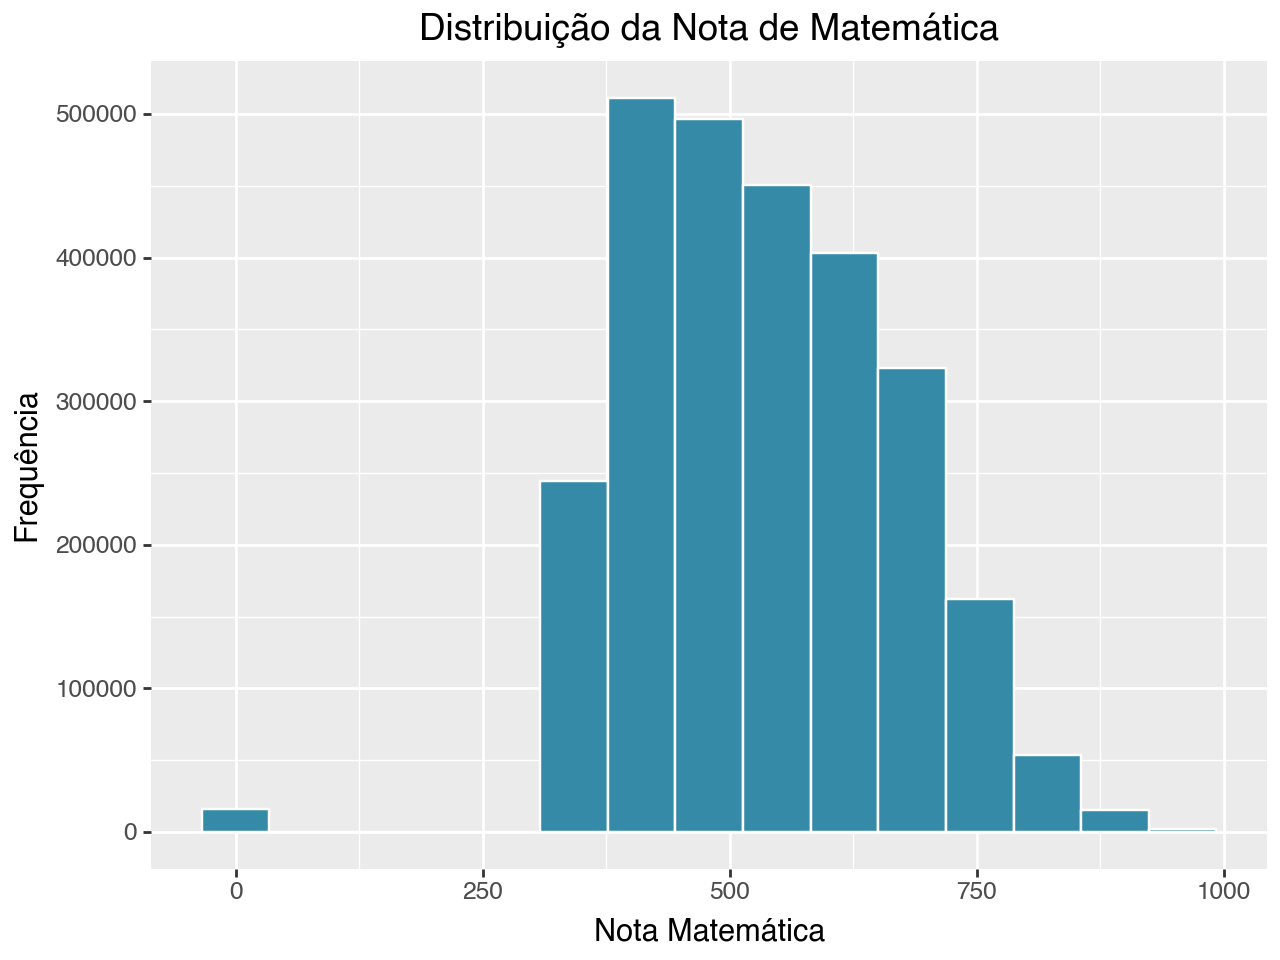

In [130]:
from plotnine import ggplot, aes, geom_histogram, labs

(ggplot(df_filtrado, aes(x='NU_NOTA_MT')) 
    + geom_histogram(bins=15, fill="#348AA7", color="white") 
    + labs(title="Distribuição da Nota de Matemática", x="Nota Matemática", y="Frequência"))

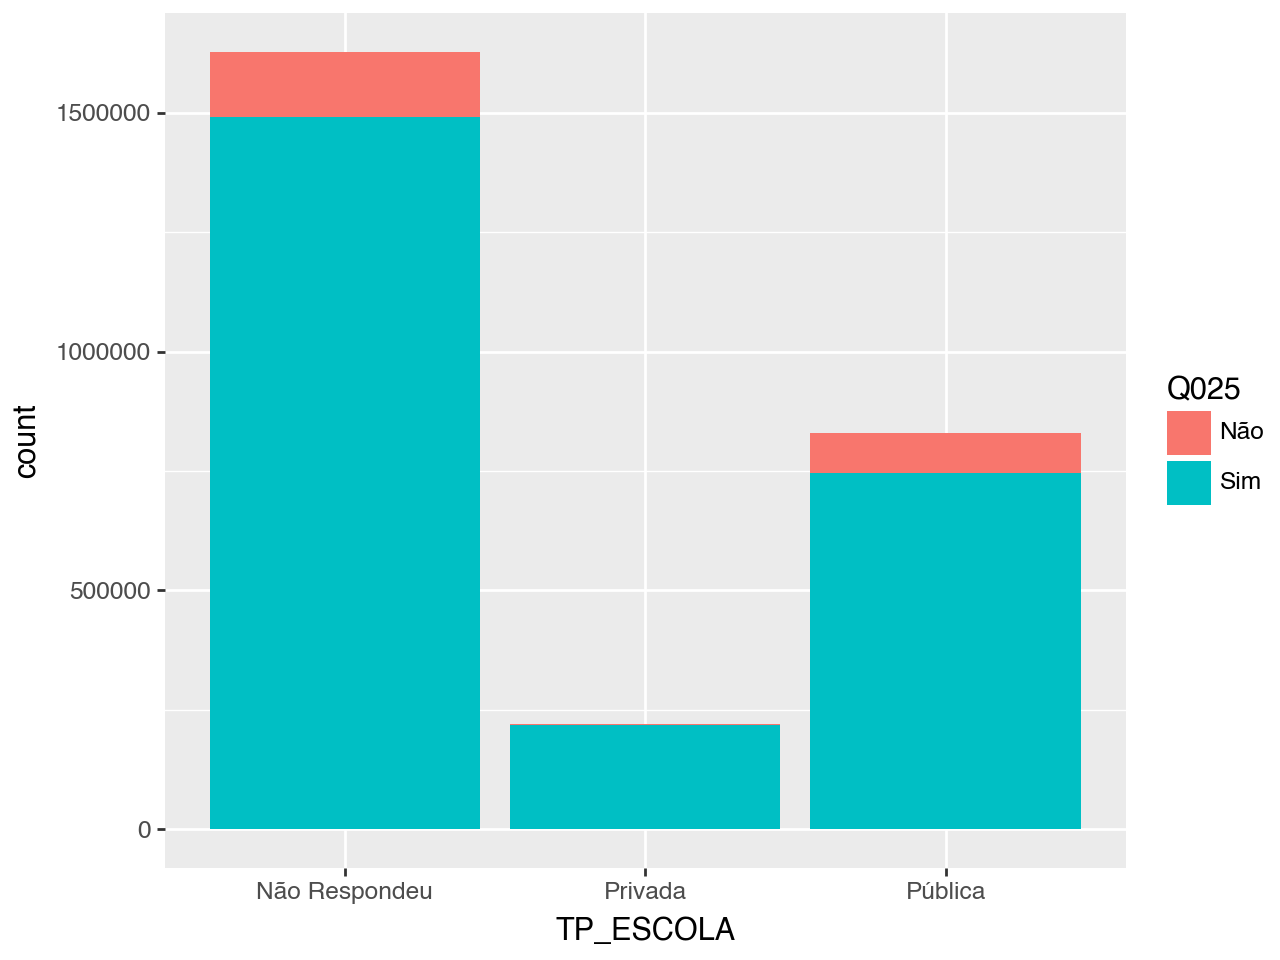

In [103]:
(ggplot(df_filtrado, aes(x='TP_ESCOLA', fill='Q025'))
  + geom_bar())

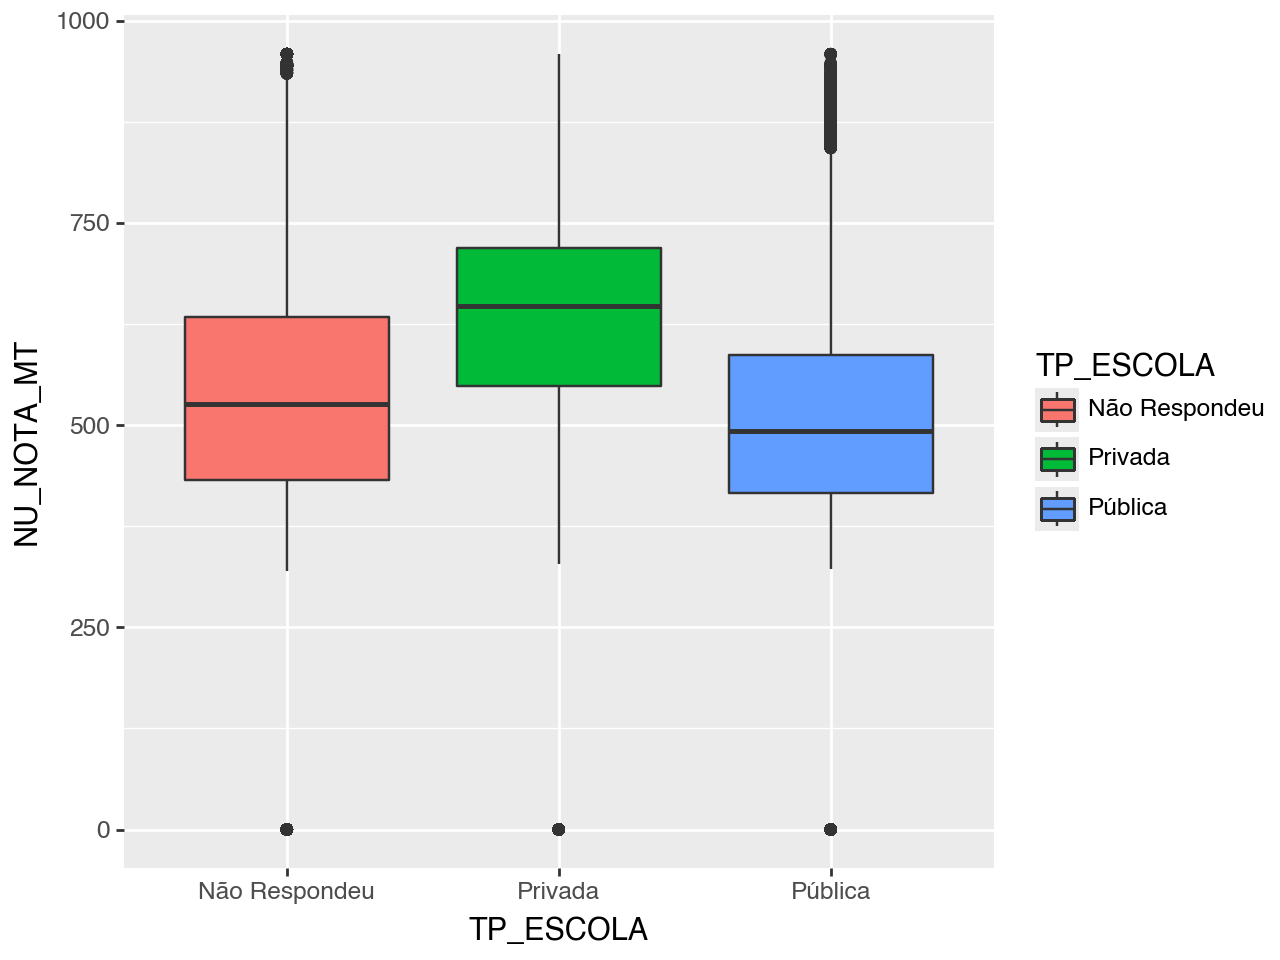

In [105]:
(ggplot(df_filtrado, aes(x='TP_ESCOLA', y='NU_NOTA_MT',fill='TP_ESCOLA'))
  + geom_boxplot())

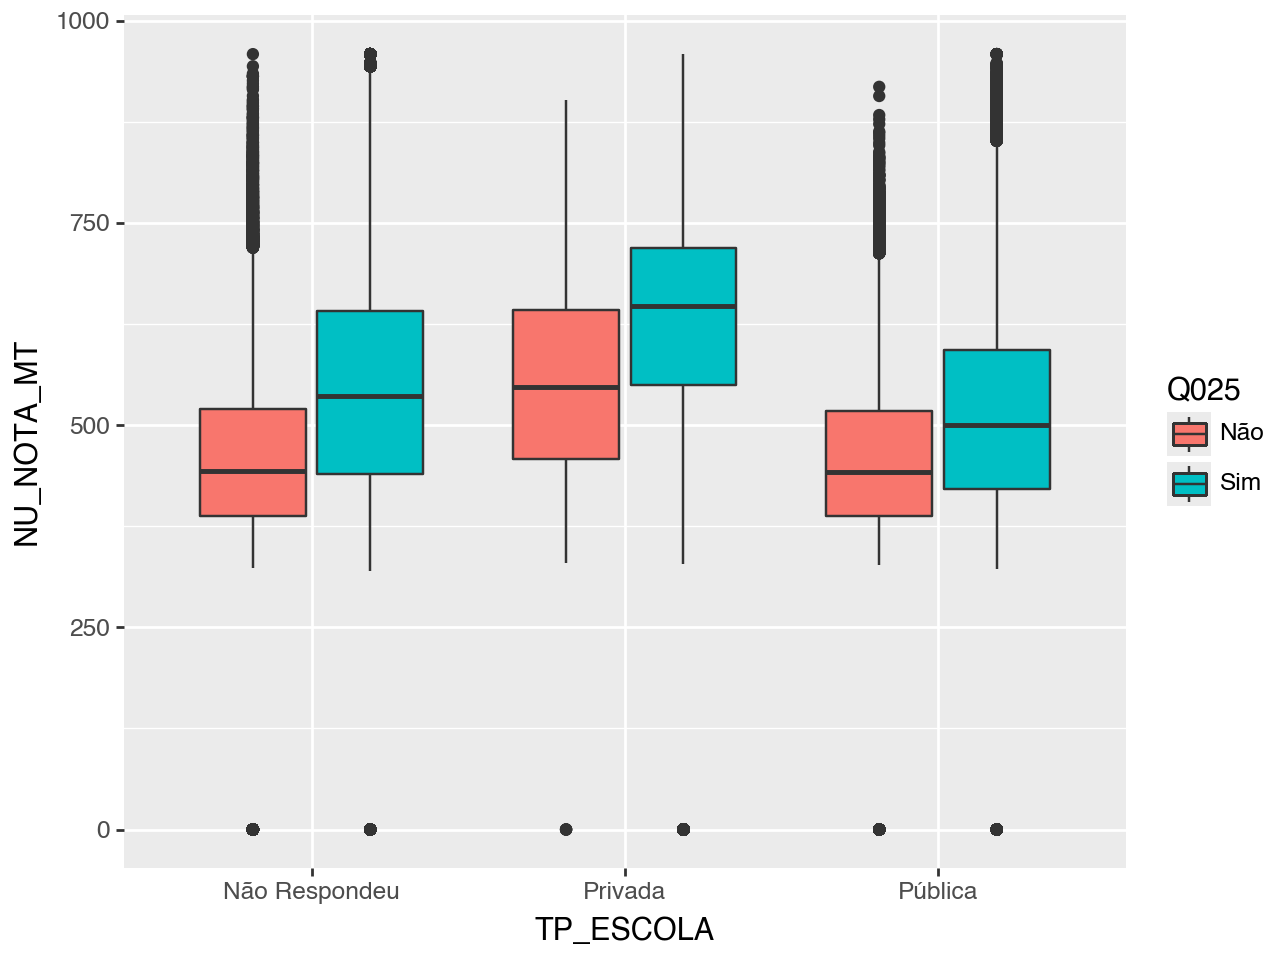

In [106]:
(ggplot(df_filtrado, aes(x='TP_ESCOLA', y='NU_NOTA_MT',fill='Q025'))
  + geom_boxplot())

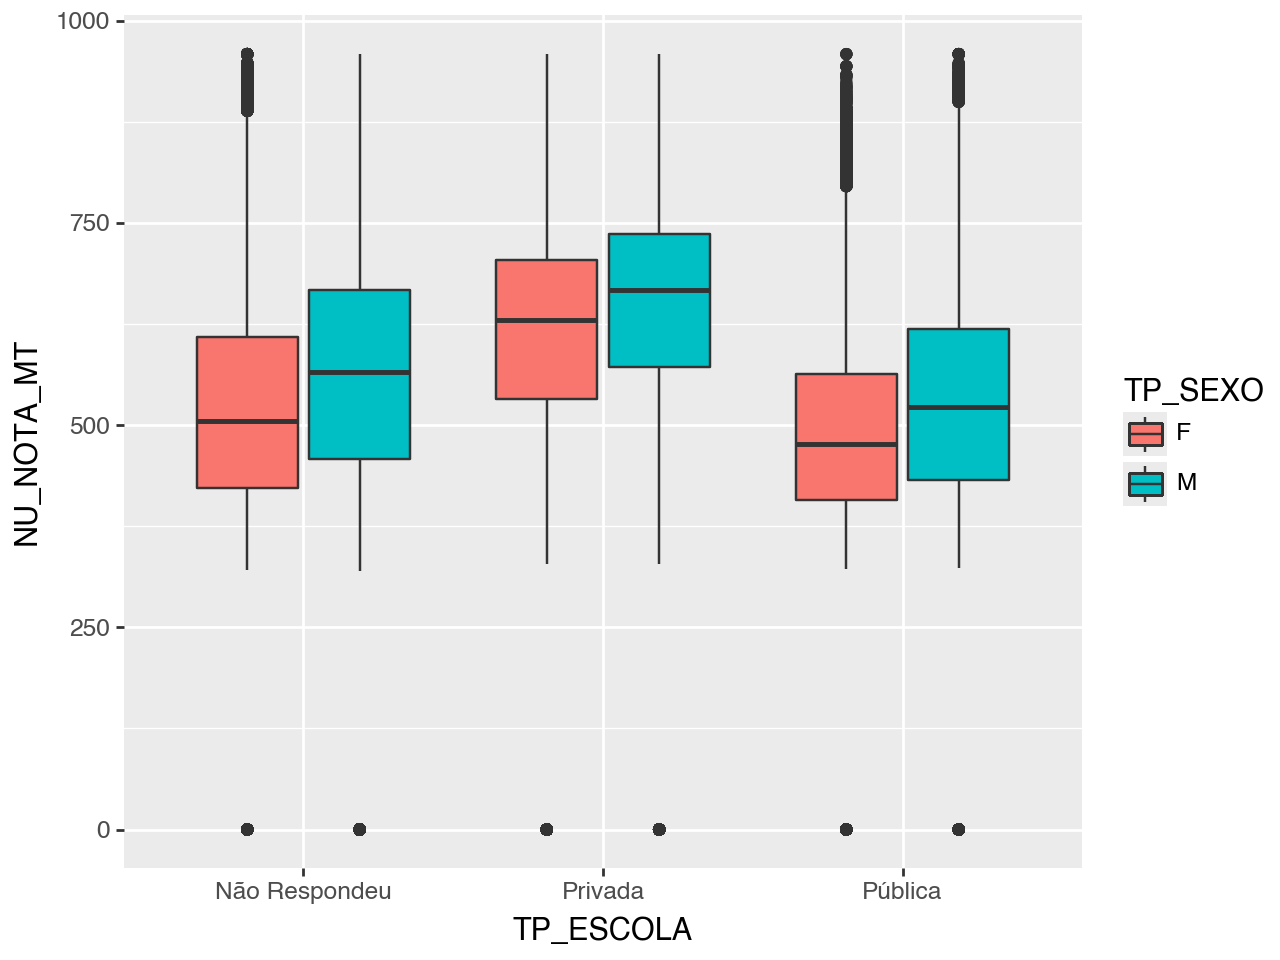

In [107]:
(ggplot(df_filtrado, aes(x='TP_ESCOLA', y='NU_NOTA_MT',fill='TP_SEXO'))
  + geom_boxplot())

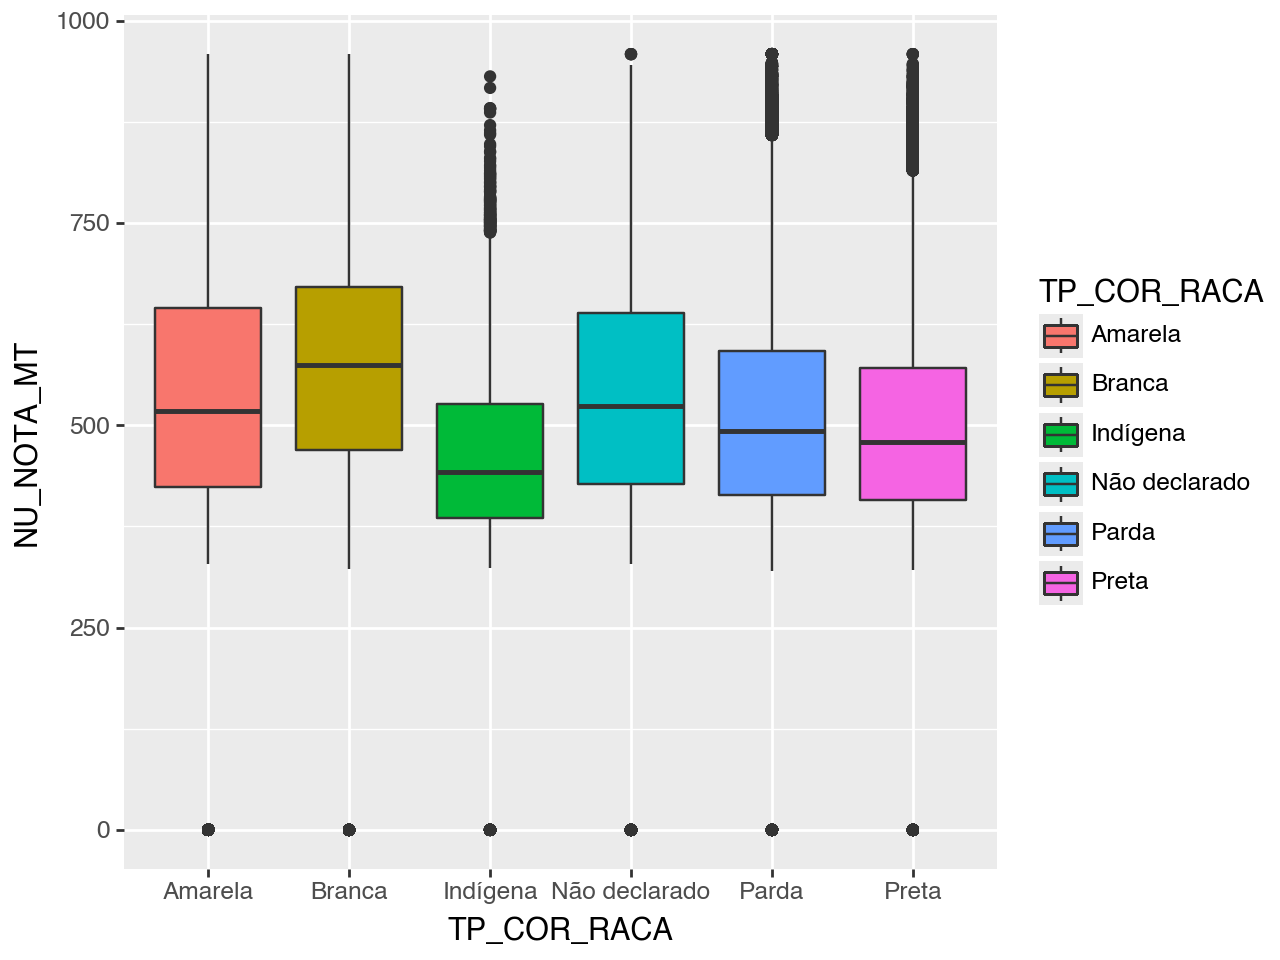

In [108]:
(ggplot(df_filtrado, aes(x='TP_COR_RACA', y='NU_NOTA_MT',fill='TP_COR_RACA'))
  + geom_boxplot())

## Analise Multinivel

A análise dos dados foi feita em Python e foi utilizado o [Rpy2](https://rpy2.github.io/) para ajustar um modelo no R, com o pacote [lme4](https://cran.r-project.org/web/packages/lme4/index.html).

### Abordagem com _lme4_

In [112]:
# Instala R and Rpy2
!apt-get install r-base
!pip install -Iv rpy2==3.4.2

zsh:1: command not found: apt-get
Using pip 25.0 from /Users/angelicacustodio/Documents/PythonBR2025_Multinivel/venv_angelica/lib/python3.13/site-packages/pip (python 3.13)
  Installing build dependencies ...   Running command pip subprocess to install build dependencies
  Using pip 25.0 from /Users/angelicacustodio/Documents/PythonBR2025_Multinivel/venv_angelica/lib/python3.13/site-packages/pip (python 3.13)
    Obtaining dependency information for setuptools>=40.8.0 from https://files.pythonhosted.org/packages/a3/dc/17031897dae0efacfea57dfd3a82fdd2a2aeb58e0ff71b77b87e44edc772/setuptools-80.9.0-py3-none-any.whl.metadata
    Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
done
  Getting requirements to build wheel ...   Running command Getting requirements to build wheel
  ['cffi>=1.10.0', 'jinja2', 'pytz', 'tzlocal']
done
  Installing backend dependencies ...   Running command pip subprocess to install backen

In [113]:
# Instala LMER packages (DEMORA UM POUQUINHO - 3~5 min)
packnames = ('lme4', 'lmerTest', 'emmeans', "geepack","optimx","r2mlm")
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages(StrVector(packnames))

R[write to console]: instalando as dependências ‘zip’, ‘xtable’, ‘openxlsx’, ‘RUnit’, ‘kutils’, ‘estimability’, ‘pracma’, ‘rockchalk’ também


R[write to console]: tentando a URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/zip_2.3.3.tgz'

R[write to console]: tentando a URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/xtable_1.8-4.tgz'

R[write to console]: tentando a URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/openxlsx_4.2.8.tgz'

R[write to console]: tentando a URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/RUnit_0.4.33.1.tgz'

R[write to console]: tentando a URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/kutils_1.73.tgz'

R[write to console]: tentando a URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/estimability_1.5.1.tgz'

R[write to console]: tentando a URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/pracma_2.4.6.tgz'

R[wr


Os pacotes binários baixados estão em
	/var/folders/3c/wsl87d4n5bx0jvvznp7rq9_h0000gn/T//Rtmp01FE8a/downloaded_packages


<rpy2.rinterface_lib.sexp.NULLType object at 0x13d2be450> [0]

In [114]:
%load_ext rpy2.ipython
# Enable cell magic for Rpy2 interface

In [140]:
df_r = df_filtrado[['NU_NOTA_MT', 'Q002', 'TP_ESCOLA', 'TP_SEXO']].copy()
df_r['TP_ESCOLA'] = df_r['TP_ESCOLA'].astype(str)

In [137]:
%%R -i df_r

library(lme4)

modelo1 <- lmer('NU_NOTA_MT ~ Q002 + (1|TP_ESCOLA)', data=df_r)
print(summary(modelo1))

Linear mixed model fit by REML ['lmerMod']
Formula: NU_NOTA_MT ~ Q002 + (1 | TP_ESCOLA)
   Data: df_r

REML criterion at convergence: 33289780

Scaled residuals: 
Formula: NU_NOTA_MT ~ Q002 + (1 | TP_ESCOLA)
   Data: df_r

REML criterion at convergence: 33289780

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.4823 -0.7172 -0.0422  0.7013  4.1958 

Random effects:
 Groups    Name        Variance Std.Dev.
 TP_ESCOLA (Intercept)  2019     44.94  
 Residual              14643    121.01  
Number of obs: 2678264, groups:  TP_ESCOLA, 3

Fixed effects:
                                                                                            Min      1Q  Median      3Q     Max 
-5.4823 -0.7172 -0.0422  0.7013  4.1958 

Random effects:
 Groups    Name        Variance Std.Dev.
 TP_ESCOLA (Intercept)  2019     44.94  
 Residual              14643    121.01  
Number of obs: 2678264, groups:  TP_ESCOLA, 3

Fixed effects:
                                                             

In [138]:
%%R
(rr2 <- ranef(modelo1))

$TP_ESCOLA
              (Intercept)
Não Respondeu   -11.96099
Privada          49.70575
Pública         -37.74990

with conditional variances for “TP_ESCOLA” 
              (Intercept)
Não Respondeu   -11.96099
Privada          49.70575
Pública         -37.74990

with conditional variances for “TP_ESCOLA” 


### Abordagem Python com _mixedlm_

In [149]:
from statsmodels.formula.api import mixedlm

modelo_interc_coef_aleatorios = mixedlm(
    "NU_NOTA_MT ~ Q002",
    data=df_filtrado,
    groups=df_filtrado["TP_ESCOLA"],
    exog_re=df_filtrado["Q002"]# Variável para o efeito aleatório além do intercepto
)

resultado_ic_ca = modelo_interc_coef_aleatorios.fit()
print(resultado_ic_ca.summary())

/Users/angelicacustodio/Documents/PythonBR2025_Multinivel/venv_angelica/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


                                                    Mixed Linear Model Regression Results
Model:                                        MixedLM                            Dependent Variable:                           NU_NOTA_MT    
No. Observations:                             2678264                            Method:                                       REML          
No. Groups:                                   3                                  Scale:                                        14643.1079    
Min. group size:                              221328                             Log-Likelihood:                               -16644891.0910
Max. group size:                              1627406                            Converged:                                    Yes           
Mean group size:                              892754.7                                                                                       
----------------------------------------------------------

### Extraindo os Resultados

In [160]:
print("\nEfeitos Fixos:")
resultado_ic_ca.fe_params


Efeitos Fixos:


Intercept                                                                                       511.733516
Q002[T.Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.]     11.007048
Q002[T.Completou a Faculdade, mas não completou a Pós-graduação.]                                89.349642
Q002[T.Completou a Pós-graduação.]                                                              101.947593
Q002[T.Completou o Ensino Médio, mas não completou a Faculdade.]                                 37.042876
Q002[T.Nunca estudou.]                                                                          -48.915306
Q002[T.Não completou a 4ª série/5º ano do Ensino Fundamental.]                                  -20.068065
Q002[T.Não sei.]                                                                                 -6.486199
dtype: float64

Aqui a referencia é: Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.

In [161]:
efeitos_aleatorios = resultado_ic_ca.random_effects

df_u = pd.DataFrame(efeitos_aleatorios).T

print("\nEfeitos Aleatórios:")
print(df_u)


Efeitos Aleatórios:
                   Group
Não Respondeu -11.947117
Privada        49.721167
Pública       -37.736289


### Testando outros cenários de modelo

In [162]:
from statsmodels.formula.api import mixedlm

modelo_interc_coef_aleatorios = mixedlm(
    "NU_NOTA_MT ~ Q002",
    data=df_filtrado,
    groups=df_filtrado["TP_DEPENDENCIA_ADM_ESC"],
    exog_re=df_filtrado["Q002"]# Variável para o efeito aleatório além do intercepto
)

resultado_ic_ca = modelo_interc_coef_aleatorios.fit()
print(resultado_ic_ca.summary())

/Users/angelicacustodio/Documents/PythonBR2025_Multinivel/venv_angelica/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


                                                    Mixed Linear Model Regression Results
Model:                                        MixedLM                            Dependent Variable:                           NU_NOTA_MT    
No. Observations:                             2678264                            Method:                                       REML          
No. Groups:                                   5                                  Scale:                                        14649.6403    
Min. group size:                              5832                               Log-Likelihood:                               -16645498.0622
Max. group size:                              1956835                            Converged:                                    Yes           
Mean group size:                              535652.8                                                                                       
----------------------------------------------------------

In [163]:
efeitos_aleatorios = resultado_ic_ca.random_effects

df_u = pd.DataFrame(efeitos_aleatorios).T

print("\nEfeitos Aleatórios:")
print(df_u)


Efeitos Aleatórios:
                   Group
Estadual      -40.064684
Federal        39.573494
Municipal     -29.603737
Não declarado -19.485852
Privada        49.540941


In [ ]:
modelo_interc_coef_aleatorios = mixedlm(
    "NU_NOTA_MT ~ Q002+ TP_SEXO+ TP_COR_RACA",
    data=df_filtrado,
    groups=df_filtrado["TP_ESCOLA"],
    exog_re=df_filtrado[["Q002","TP_SEXO", "TP_COR_RACA"]]
)

resultado_ic_ca = modelo_interc_coef_aleatorios.fit()
print(resultado_ic_ca.summary())

/Users/angelicacustodio/Documents/PythonBR2025_Multinivel/venv_angelica/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


                                                    Mixed Linear Model Regression Results
Model:                                       MixedLM                             Dependent Variable:                            NU_NOTA_MT    
No. Observations:                            2678264                             Method:                                        REML          
No. Groups:                                  3                                   Scale:                                         13837.0237    
Min. group size:                             221328                              Log-Likelihood:                                -16569064.8422
Max. group size:                             1627406                             Converged:                                     Yes           
Mean group size:                             892754.7                                                                                         
----------------------------------------------------

In [169]:
efeitos_aleatorios = resultado_ic_ca.random_effects

df_u = pd.DataFrame(efeitos_aleatorios).T

print("\nEfeitos Aleatórios:")
print(df_u)


Efeitos Aleatórios:
                   Group
Não Respondeu  -8.400808
Privada        42.923152
Pública       -34.482581


In [ ]:
#ajuste da categoria de referencia para raça
df_filtrado['TP_COR_RACA'] = pd.Categorical(df_filtrado['TP_COR_RACA'], categories=['Branca','Preta','Parda','Amarela','Indígena','Não declarado'], ordered=True)

# Refit do modelo com nova categoria de referência
modelo_interc_coef_aleatorios = mixedlm(
    "NU_NOTA_MT ~ Q002+ TP_SEXO+ TP_COR_RACA",
    data=df_filtrado,
    groups=df_filtrado["TP_ESCOLA"],
    exog_re=df_filtrado[["Q002","TP_SEXO", "TP_COR_RACA"]]
)

resultado_ic_ca = modelo_interc_coef_aleatorios.fit()
print(resultado_ic_ca.summary())

/Users/angelicacustodio/Documents/PythonBR2025_Multinivel/venv_angelica/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


                                                    Mixed Linear Model Regression Results
Model:                                       MixedLM                             Dependent Variable:                            NU_NOTA_MT    
No. Observations:                            2678264                             Method:                                        REML          
No. Groups:                                  3                                   Scale:                                         13837.0237    
Min. group size:                             221328                              Log-Likelihood:                                -16569064.8422
Max. group size:                             1627406                             Converged:                                     Yes           
Mean group size:                             892754.7                                                                                         
----------------------------------------------------

In [171]:
#ajuste da categoria de referencia para raça
df_filtrado['TP_COR_RACA'] = pd.Categorical(df_filtrado['TP_COR_RACA'], categories=['Branca','Preta','Parda','Amarela','Indígena','Não declarado'], ordered=True)

# Refit do modelo com nova categoria de referência
modelo_interc_coef_aleatorios = mixedlm(
    "NU_NOTA_MT ~ Q025+ TP_SEXO+ TP_COR_RACA",
    data=df_filtrado,
    groups=df_filtrado["TP_ESCOLA"],
    exog_re=df_filtrado[["Q025","TP_SEXO", "TP_COR_RACA"]]
)

resultado_ic_ca = modelo_interc_coef_aleatorios.fit()
print(resultado_ic_ca.summary())

/Users/angelicacustodio/Documents/PythonBR2025_Multinivel/venv_angelica/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


                    Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:      NU_NOTA_MT    
No. Observations:        2678264       Method:                  REML          
No. Groups:              3             Scale:                   14745.1412    
Min. group size:         221328        Log-Likelihood:          -16654188.5604
Max. group size:         1627406       Converged:               Yes           
Mean group size:         892754.7                                             
------------------------------------------------------------------------------
                               Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------------------------
Intercept                      555.920   70.107    7.930 0.000 418.512 693.327
Q025[T.Sim]                     56.219    0.272  206.532 0.000  55.685  56.752
TP_SEXO[T.F]                   -41.303    0.153 -270.473 0.000 -41.602 -4

### Considerando a intecao Raca x Sexo

In [172]:
# Refit do modelo com nova categoria de referência
modelo_interc_coef_aleatorios = mixedlm(
    "NU_NOTA_MT ~ TP_SEXO* TP_COR_RACA",
    data=df_filtrado,
    groups=df_filtrado["TP_ESCOLA"],
    exog_re=df_filtrado[["TP_SEXO", "TP_COR_RACA"]]
)

resultado_ic_ca = modelo_interc_coef_aleatorios.fit()
print(resultado_ic_ca.summary())

/Users/angelicacustodio/Documents/PythonBR2025_Multinivel/venv_angelica/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


                           Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:           NU_NOTA_MT    
No. Observations:            2678264            Method:                       REML          
No. Groups:                  3                  Scale:                        14977.0412    
Min. group size:             221328             Log-Likelihood:               -16675079.0059
Max. group size:             1627406            Converged:                    Yes           
Mean group size:             892754.7                                                       
--------------------------------------------------------------------------------------------
                                            Coef.   Std.Err.    z     P>|z|  [0.025   0.975]
--------------------------------------------------------------------------------------------
Intercept                                   611.088   70.656    8.649 0.000  472.605 749.571
TP_SE

O ganho de nota associado a Sexo=F é mais fraco para alunos Pardos.

In [174]:
# Refit do modelo com nova categoria de referência
modelo_interc_coef_aleatorios = mixedlm(
    "NU_NOTA_MT ~ Q025* TP_SEXO",
    data=df_filtrado,
    groups=df_filtrado["TP_ESCOLA"],
    exog_re=df_filtrado[["Q025", "TP_SEXO"]]
)

resultado_ic_ca = modelo_interc_coef_aleatorios.fit()
print(resultado_ic_ca.summary())

/Users/angelicacustodio/Documents/PythonBR2025_Multinivel/venv_angelica/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


                  Mixed Linear Model Regression Results
Model:                MixedLM      Dependent Variable:     NU_NOTA_MT    
No. Observations:     2678264      Method:                 REML          
No. Groups:           3            Scale:                  15472.3075    
Min. group size:      221328       Log-Likelihood:         -16718653.9085
Max. group size:      1627406      Converged:              Yes           
Mean group size:      892754.7                                           
-------------------------------------------------------------------------
                           Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------------
Intercept                  510.203   71.816   7.104 0.000 369.446 650.960
Q025[T.Sim]                 75.888    0.482 157.401 0.000  74.943  76.833
TP_SEXO[T.F]               -30.485    0.564 -54.029 0.000 -31.590 -29.379
Q025[T.Sim]:TP_SEXO[T.F]   -11.143    0.587 -18.976 0.00